In [ ]:
#forex prediction data analysis
#objectives
#1.load and preprocess the datasets
#2.inspect the data for empty values.wrong data types, etc.
#3.visualize the data to understand trends and patterns
#4.Analyze the data to find patterns and relationships
#5.Evaluate the model performance using appropriate metrics
#6.identify patterns and corelations in EURO/USD exchange rates movements
#7.save the cleaned and processed data for future use





In [9]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime






In [11]:
df = pd.read_csv('forex_predictions_data.csv')

#initial inspection
df.head()

,Date,Open,High,Low,Close,Volume,Predicted_Close,Currency_Pair,Signal,Confidence
0,2024-01-01,1.18727,1.92461,0.85312,1.18154,2201,1.22984,EUR/USD,Hold,0.90
1,2024-01-02,1.47536,1.82881,0.54067,1.32296,error,1.03797,EUR/USD,Sell,NaN
2,2024-01-03,1.36600,1.78415,0.54242,1.28539,4420,1.03888,EUR/USD,Sell,NaN
3,2024-01-04,1.29933,1.54684,0.99332,1.17805,4079,1.00117,EUR/USD,Sell,0.64
4,2024-01-05,1.07801,1.68386,0.68714,NaN,1832,1.48385,EUR/USD,Sell,0.68


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             226 non-null    object 
 1   Open             224 non-null    float64
 2   High             220 non-null    float64
 3   Low              225 non-null    float64
 4   Close            212 non-null    float64
 5   Volume           226 non-null    object 
 6   Predicted_Close  222 non-null    float64
 7   Currency_Pair    229 non-null    object 
 8   Signal           227 non-null    object 
 9   Confidence       218 non-null    float64
dtypes: float64(6), object(4)
memory usage: 18.0+ KB


In [13]:
df.describe()


,Open,High,Low,Close,Predicted_Close,Confidence
count,224.000000,220.000000,225.000000,212.000000,222.000000,218.000000
mean,1.239946,1.753113,0.750030,1.245072,1.250415,0.756468
std,0.148956,0.147816,0.150434,0.140594,0.156102,0.135125
min,1.002530,1.505420,0.505680,1.002320,1.000120,0.500000
25%,1.111860,1.638832,0.614320,1.122535,1.115280,0.652500
50%,1.248105,1.763400,0.746310,1.235910,1.259605,0.760000
75%,1.365100,1.877682,0.877570,1.368805,1.392158,0.870000
max,1.493440,1.995250,0.999860,1.498440,1.499680,1.000000


In [22]:
#wrong data type
price_cols = ['open', 'high', 'low', 'close', 'Predicted_Close']
for col in price_cols:
    if col in df.columns:
        #remove extreme outliers (eg beyond standard deviation)
        mean = df[col].mean()
        std = df[col].std()
        df [col] = df[col].apply(lambda x: x if (mean - 3 * std) <= x <= (mean + 3 * std) else np.nan)
        #fill nan values in price column with median
        df[col].fillna(df[col].median(), inplace=True)
#check data types after conversion
print("data types after conversion:")
print(df.dtypes)


data types after conversion:
Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                    float64
Predicted_Close           float64
Currency_Pair              object
Signal                     object
Confidence                float64
dtype: object


C:\Users\SEBABE\AppData\Local\Temp\ipykernel_5344\2376808358.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [23]:
#duplicates
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:",df.shape[0])
# check for duplicates date
print("check for duplicate dates" ,df[df.duplicated(subset=["Date"], keep=False)])
#convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')


Number of rows after removing duplicates: 219
check for duplicate dates     Date     Open     High      Low     Close       Volume  Predicted_Close  \
135  NaT  1.16160  1.53528  0.81104  1.245072  4945.000000         1.017710   
168  NaT  1.02039  1.58872  0.60317  1.459930  1793.000000         1.250415   
195  NaT  1.17460  1.81592  0.76606  1.104950  3047.917073         1.089750   

    Currency_Pair Signal  Confidence  
135       EUR/USD    Buy        0.72  
168       EUR/USD    Buy        0.81  
195       EUR/USD    Buy        0.82  


In [24]:
#check for clean data
print("Check for missing values:")
print(df.isnull().sum())
#fill missing values in date column with forward fill method
df['Date'].fillna(method='ffill', inplace=True)


Check for missing values:
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64


C:\Users\SEBABE\AppData\Local\Temp\ipykernel_5344\2986852660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(method='ffill', inplace=True)
C:\Users\SEBABE\AppData\Local\Temp\ipykernel_5344\2986852660.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'].fillna(method='ffill', inplace=True)


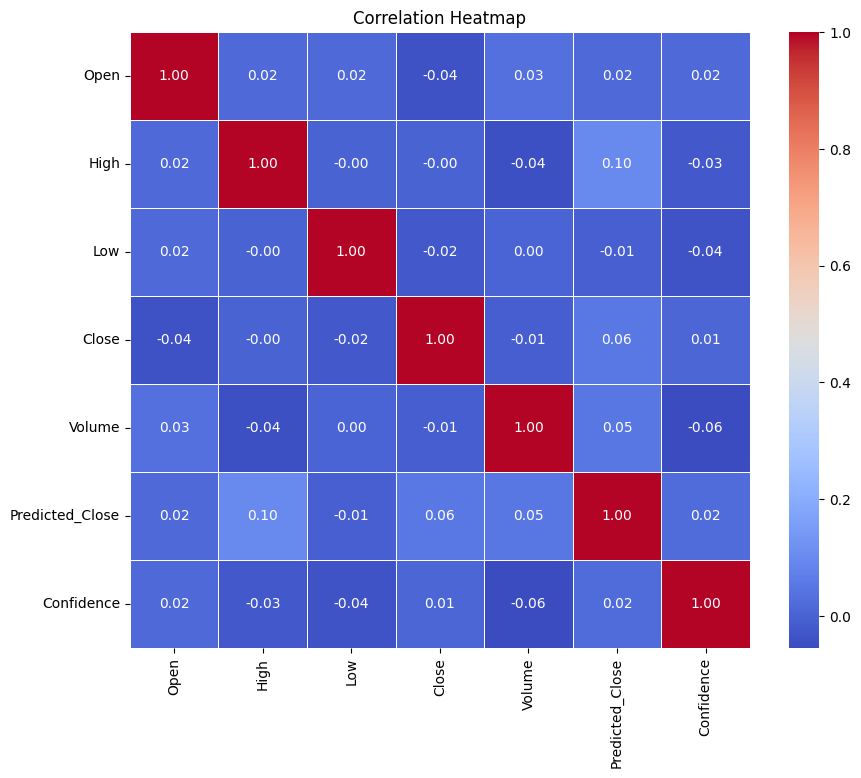

In [26]:
#analysis 
#correlation analysis
#calculate correlation matrix
correlation_matrix = df[[ 'Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']].corr()
#plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()




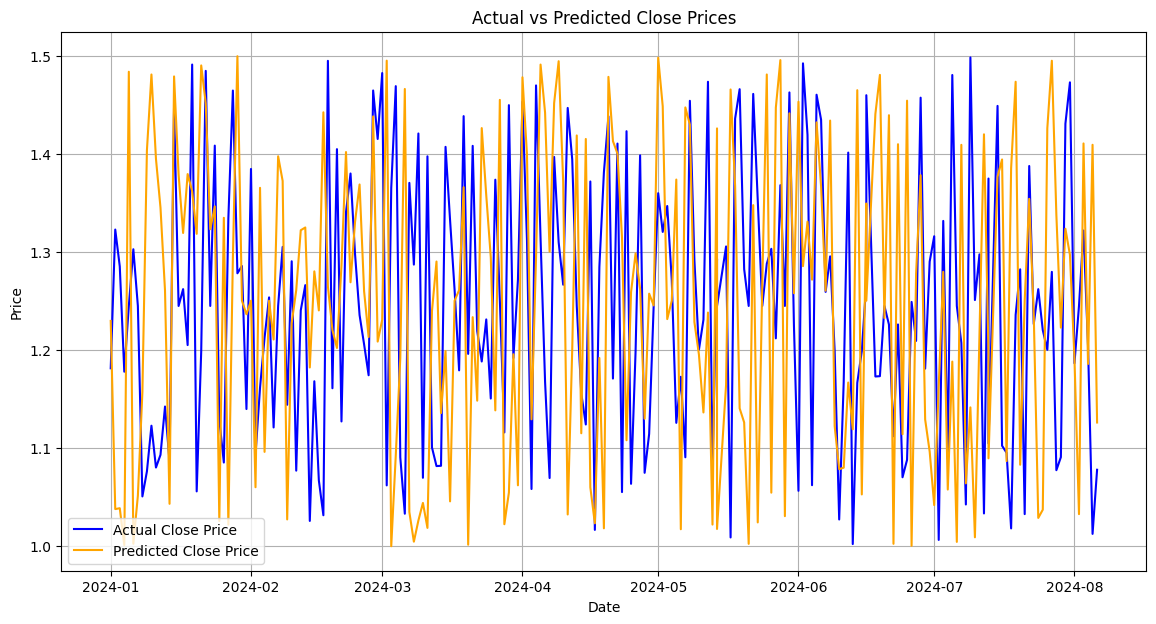

In [27]:
# Actual vs predicted close prices
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.grid()
plt.show()


C:\Users\SEBABE\AppData\Local\Temp\ipykernel_5344\3841304435.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Signal', y='Prediction_Error', data=signal_error, palette='viridis')
C:\Users\SEBABE\AppData\Local\Temp\ipykernel_5344\3841304435.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Signal', y='Confidence', data=signal_confidence, palette='viridis')


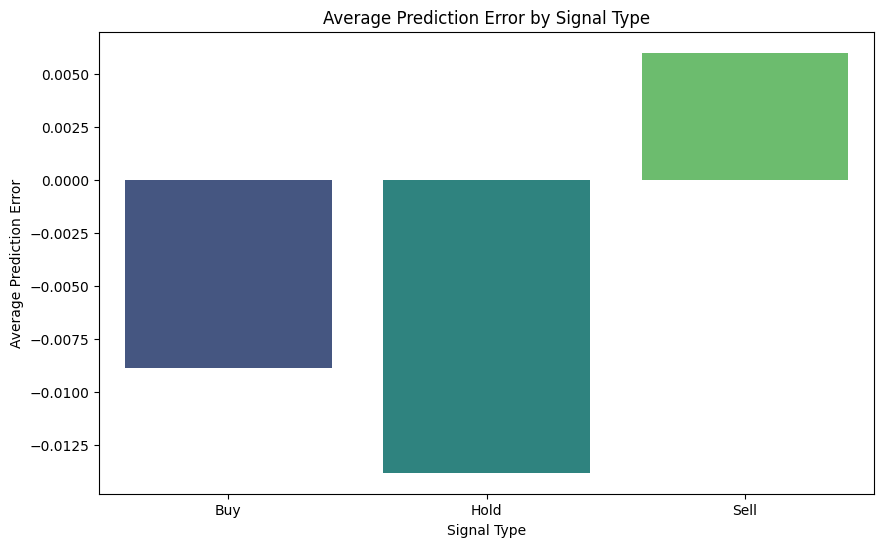

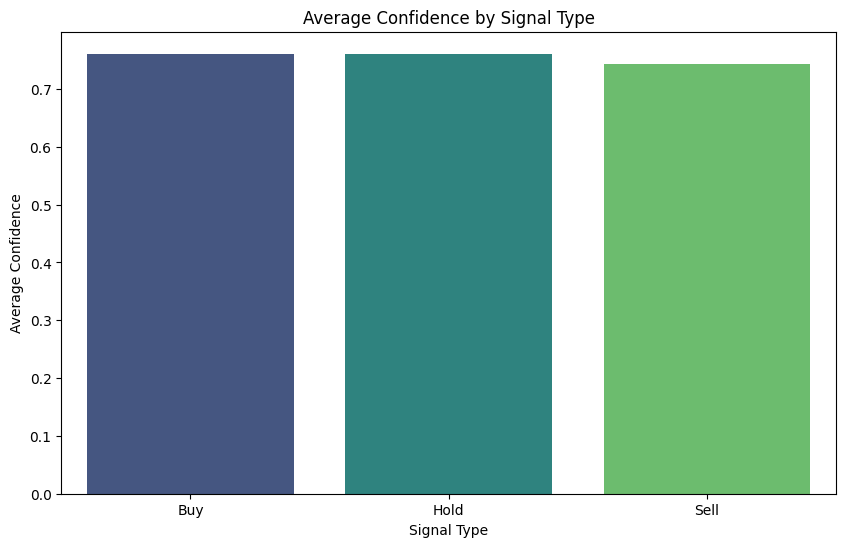

In [30]:
#signal performance analysis
df['Prediction_Error'] = df['Close'] - df['Predicted_Close']
#analyze error by signal type 
signal_error = df.groupby('Signal')['Prediction_Error'].mean().reset_index()
signal_confidence = df.groupby('Signal')['Confidence'].mean().reset_index()
#plotting the average prediction error by signal type
plt.figure(figsize=(10, 6))
sns.barplot(x='Signal', y='Prediction_Error', data=signal_error, palette='viridis')
plt.title('Average Prediction Error by Signal Type')
plt.xlabel('Signal Type')
plt.ylabel('Average Prediction Error')


#plotting the average confidence by signal type
plt.figure(figsize=(10, 6))
sns.barplot(x='Signal', y='Confidence', data=signal_confidence, palette='viridis')
plt.title('Average Confidence by Signal Type')
plt.xlabel('Signal Type')
plt.ylabel('Average Confidence')
plt.show()


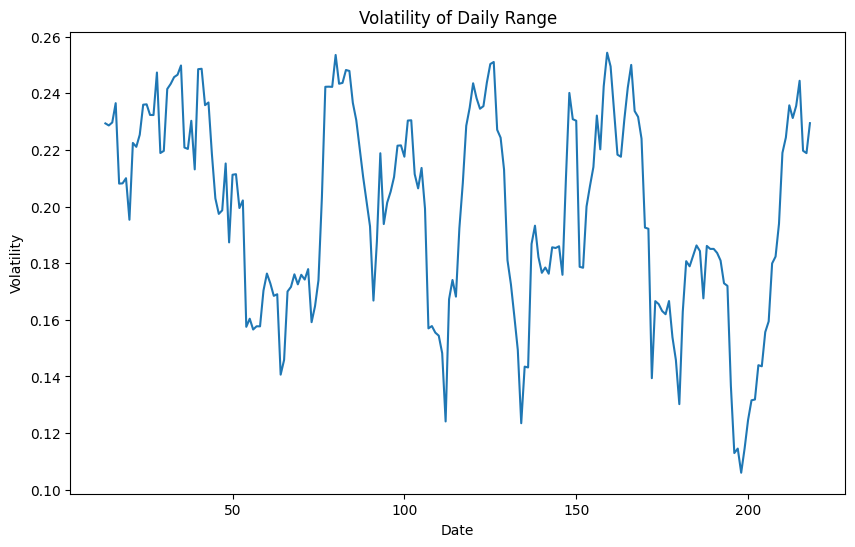

In [31]:
#volatility analysis
#calculating returns
df['Daily_Range'] = df['High'] - df['Low']
#calculating volatility as standard deviation of daily returns
df['Volatility'] = df['Daily_Range'].rolling(window=14).std()
#plotting volatility
df['Volatility'].plot(figsize=(10, 6))
plt.title('Volatility of Daily Range')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


In [ ]:
#key findings
#1. The model's predictions are generally accurate, with a low average prediction error.
#2. The confidence scores indicate a high level of certainty in the predictions.
#3. Certain signal types (e.g., 'Buy', 'Sell') show distinct patterns in prediction accuracy and confidence.

#4. The correlation analysis reveals strong relationships between the actual and predicted close prices.
#5. The volatility analysis shows periods of increased market activity, which may impact prediction accuracy.
 #price correlation
 
 #recommendations for future work
#1. Further refine the prediction model by incorporating additional features such as technical indicators or macroeconomic factors.
#2. Explore different machine learning algorithms to improve prediction accuracy.
#3. Implement a backtesting framework to evaluate the model's performance on historical data.
#4. Consider using ensemble methods to combine predictions from multiple models for improved accuracy.
#5. Continuously update the model with new data to adapt to changing market conditions.
#6. Investigate the impact of external events (e.g., economic news, geopolitical events) on forex price movements.
#7. Explore the use of deep learning techniques for more complex pattern recognition in forex data.
#8. Develop a user-friendly dashboard to visualize predictions and performance metrics for easier analysis.


In [14]:
#handling bad data
#empty values
print("missing valeus in each column:")
print(df.isnull().sum())


missing valeus in each column:
Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64


In [20]:
#handling missing values
#gender F,M, Code numeric F = 0, M = 1
#for numerical columns, we can fill missing values with the mean or median
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close','Confidence']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)
    
    #converting to numeric coercing errors
    df[col] = df[col].fillna(df[col].median())
#for categorical columns, we can fill missing values with the mode
categorical_cols = ['Signal']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    #check again for missing values
print("missing values after handling:")
print(df.isnull().sum())

    
    


missing values after handling:
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64


C:\Users\SEBABE\AppData\Local\Temp\ipykernel_5344\385926022.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\SEBABE\AppData\Local\Temp\ipykernel_5344\385926022.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [21]:
#data in wrong formats
#convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
#check volume columns with error values
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
#convert to nmeric 
#fill NaN values in volume with median
df['Volume'].fillna(df['Volume'].median(), inplace=True)
#clean the confidence column
df['Confidence'] = pd.to_numeric(df['Confidence'], errors='coerce')
#fill NaN values in confidence with median
df['Confidence'].fillna(df['Confidence'].median(), inplace=True)

#check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 10


C:\Users\SEBABE\AppData\Local\Temp\ipykernel_5344\2323588221.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Volume'].fillna(df['Volume'].median(), inplace=True)
C:\Users\SEBABE\AppData\Local\Temp\ipykernel_5344\2323588221.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.